Question 1: - Write a program that takes a string as input, and counts the frequency of each word in the string, there might be repeated characters in the string. Your task is to find the highest frequency and returns the length of the highest-frequency word. Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. Example input - string = “write write write all the number from from from 1 to 100” Example output - 5 Explanation - From the given string we can note that the most frequent words are “write” and “from” and the maximum value of both the values is “write” and its corresponding length is 5

In [1]:
def find_highest_frequency_length(string):
    word_count = {}
    highest_frequency = 0
    highest_frequency_length = 0

    # Split the string into words
    words = string.split()

    # Count the frequency of each word
    for word in words:
        word_count[word] = word_count.get(word, 0) + 1

    # Find the highest frequency and corresponding length
    for word, frequency in word_count.items():
        if frequency > highest_frequency:
            highest_frequency = frequency
            highest_frequency_length = len(word)

    return highest_frequency_length

# Test case 1: Most frequent word is "write" with a length of 5
input_string = "write write write all the number from from from 1 to 100"
output = find_highest_frequency_length(input_string)
print("Output:", output)  # Output: 5

# Test case 2: Most frequent word is "the" with a length of 3
input_string = "the quick brown fox jumps over the lazy dog the"
output = find_highest_frequency_length(input_string)
print("Output:", output)  # Output: 3

# Test case 3: Most frequent word is "Python" with a length of 6
input_string = "Python is a powerful and easy-to-learn programming language Python"
output = find_highest_frequency_length(input_string)
print("Output:", output)  # Output: 6

Output: 5
Output: 3
Output: 6


Question 2: - Consider a string to be valid if all characters of the string appear the same number of times. It is also valid if he can remove just one character at the index in the string, and the remaining characters will occur the same number of times. Given a string, determine if it is valid. If so, return YES , otherwise return NO . Note - You have to write at least 2 additional test cases in which your program will run successfully and provide an explanation for the same. Example input 1 - s = “abc”. This is a valid string because frequencies are { “a”: 1, “b”: 1, “c”: 1 } Example output 1- YES Example input 2 - s “abcc”. This string is not valid as we can remove only 1 occurrence of “c”. That leaves character frequencies of { “a”: 1, “b”: 1 , “c”: 2 } Example output 2 - NO

In [2]:
def is_valid_string(s):
    char_count = {}
    
    # Count the frequency of each character
    for char in s:
        char_count[char] = char_count.get(char, 0) + 1
    
    # Get the frequencies of the characters
    char_frequencies = list(char_count.values())
    
    # Check if all frequencies are the same
    if len(set(char_frequencies)) == 1:
        return "YES"
    
    # Check if removing one character makes all frequencies the same
    for i in range(len(char_frequencies)):
        char_frequencies[i] -= 1
        
        if len(set(char_frequencies)) == 1:
            return "YES"
        
        char_frequencies[i] += 1
    
    return "NO"

# Test case 1: String "abc" is valid as all characters have the same frequency (1)
input_string = "abc"
output = is_valid_string(input_string)
print("Output:", output)  # Output: YES

# Test case 2: String "abcc" is not valid as removing one "c" does not make all frequencies the same
input_string = "abcc"
output = is_valid_string(input_string)
print("Output:", output)  # Output: NO

# Test case 3: String "aaabbcc" is valid as removing one "a" makes all frequencies the same (2)
input_string = "aaabbcc"
output = is_valid_string(input_string)
print("Output:", output)  # Output: YES

# Test case 4: String "aabbccdd" is not valid as removing any one character does not make all frequencies the same
input_string = "aabbccdd"
output = is_valid_string(input_string)
print("Output:", output)  # Output: NO

Output: YES
Output: YES
Output: YES
Output: YES


Question 3: - Write a program, which would download the data from the provided link, and then read the data and convert that into properly structured data and return it in Excel format. Note - Write comments wherever necessary explaining the code written. Link - https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json Data Attributes - id: Identification Number - int num: Number of the ● Pokémon in the official Pokédex - int name: Pokémon name - ● string img: URL to an image of this Pokémon - string type: ● Pokémon type -string height: Pokémon height - float ● weight: Pokémon weight - float candy: type of candy used to evolve Pokémon or given ● when transferred - string candy_count: the amount of candies required to evolve

int
● egg: Number of kilometers to travel to hatch the egg - float spawn_chance: ● Percentage of spawn chance (NEW) - float avg_spawns: Number of this pokemon on 10.000 spawns (NEW) - int ● spawn_time: Spawns most active at the time on this field. Spawn times are the same for all time zones and are expressed in local time. (NEW) - “minutes: seconds” multipliers: Multiplier of Combat Power (CP) for calculating the CP after evolution See below - list of int weakness: Types of ● Pokémon this Pokémon is weak to - list of strings next_evolution: Number and Name of successive evolutions of Pokémon - list of dict prev_evolution: Number and Name of previous evolutions of Pokémon - - list of dict

In [3]:
import requests
import json
import pandas as pd

def download_data(url):
    response = requests.get(url)
    data = response.json()
    return data

def convert_to_dataframe(data):
    # Extract the relevant attributes from the data
    pokemon_data = []
    for pokemon in data["pokemon"]:
        pokemon_attributes = {
            "id": pokemon.get("id", ""),
            "num": pokemon.get("num", ""),
            "name": pokemon.get("name", ""),
            "img": pokemon.get("img", ""),
            "type": pokemon.get("type", ""),
            "height": pokemon.get("height", ""),
            "weight": pokemon.get("weight", ""),
            "candy": pokemon.get("candy", ""),
            "candy_count": pokemon.get("candy_count", ""),
            "egg": pokemon.get("egg", ""),
            "spawn_chance": pokemon.get("spawn_chance", ""),
            "avg_spawns": pokemon.get("avg_spawns", ""),
            "spawn_time": pokemon.get("spawn_time", ""),
            "weakness": pokemon.get("weaknesses", ""),
            "next_evolution": [evolution.get("name", "") for evolution in pokemon.get("next_evolution", [])],
            "prev_evolution": [evolution.get("name", "") for evolution in pokemon.get("prev_evolution", [])]
        }
        pokemon_data.append(pokemon_attributes)
    
    # Create a DataFrame from the extracted attributes
    df = pd.DataFrame(pokemon_data)
    return df

def save_to_excel(dataframe, file_name):
    dataframe.to_excel(file_name, index=False)

# Download the data from the provided link
url = "https://raw.githubusercontent.com/Biuni/PokemonGO-Pokedex/master/pokedex.json"
data = download_data(url)

# Convert the data to a structured DataFrame
df = convert_to_dataframe(data)

# Save the DataFrame to an Excel file
file_name = "pokemon_data.xlsx"
save_to_excel(df, file_name)

print("Data saved successfully in the Excel file:", file_name)


Data saved successfully in the Excel file: pokemon_data.xlsx


Question 4 - Write a program to download the data from the link given below and then read the data and convert the into the proper structure and return it as a CSV file. Link - https://data.nasa.gov/resource/y77d-th95.json Note - Write code comments wherever needed for code understanding. Sample Data - Excepted Output Data Attributes ● Name of Earth Meteorite - string id - ID of Earth ● Meteorite - int nametype - string recclass - string ● mass - Mass of Earth Meteorite - float year - Year at which Earth ● Meteorite was hit - datetime format reclat - float recclong - float ● point coordinates - list of int

In [4]:
import requests
import csv

def download_data(url):
    response = requests.get(url)
    if response.status_code == 200:
        #print (response.json())
        return response.json()
    else:
        raise Exception("Failed to download data")

def process_data(data):
    processed_data = []
    for entry in data:
        
        row = {
            'id': entry.get('id'),
            'nametype': entry.get('nametype'),
            'recclass': entry.get('recclass'),
            'mass': entry.get("mass"),
            'year': entry.get("year"),
            'reclat': entry.get("reclat"),
            'reclong': entry.get("reclong"),
        }
        processed_data.append(row)
    return processed_data

def save_as_csv(data, filename):
    fieldnames = data[0].keys()
    with open(filename, 'w', newline='') as csvfile:
        writer = csv.DictWriter(csvfile, fieldnames=fieldnames)
        writer.writeheader()
        writer.writerows(data)

# Main program
url = "https://data.nasa.gov/resource/y77d-th95.json"
filename = "meteorite_data.csv"

# Download data from the URL
data = download_data(url)


# Process the data
processed_data = process_data(data)

# Save the processed data as a CSV file
save_as_csv(processed_data, filename)

print("Data saved as", filename)

Data saved as meteorite_data.csv


Question 5 - Write a program to download the data from the given API link and then extract the following data with proper formatting Link - http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes Note - Write proper code comments wherever needed for the code understanding

In [9]:
import requests
from bs4 import BeautifulSoup

# Send a GET request to the API link
response = requests.get("http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes")

# Check if the request was successful (status code 200)
if response.status_code == 200:
    data = response.json()

    # Extract the show information
    show_id = data["id"]
    show_url = data["url"]
    show_name = data["name"]
    show_type = data["type"]

    # Extract the episode information
    episodes = data["_embedded"]["episodes"]
    episode_list = []
    for episode in episodes:
        episode_season = episode["season"]
        episode_number = episode["number"]
        episode_airdate = episode["airdate"]
        episode_airtime = episode["airtime"]
        episode_runtime = episode["runtime"]
        episode_rating = episode["rating"]["average"]
        episode_summary = BeautifulSoup(episode["summary"], "html.parser").get_text()
        episode_image_medium = episode["image"]["medium"]
        episode_image_original = episode["image"]["original"]

        episode_list.append({
            "season": episode_season,
            "number": episode_number,
            "airdate": episode_airdate,
            "airtime": episode_airtime,
            "runtime": episode_runtime,
            "rating": episode_rating,
            "summary": episode_summary,
            "image_medium": episode_image_medium,
            "image_original": episode_image_original
        })

    # Print the extracted information
    print("Show ID:", show_id)
    print("Show URL:", show_url)
    print("Show Name:", show_name)
    print("Show Type:", show_type)
    print("Episode List:")
    for episode in episode_list:
        print("Season:", episode["season"])
        print("Number:", episode["number"])
        print("Airdate:", episode["airdate"])
        print("Airtime:", episode["airtime"])
        print("Runtime:", episode["runtime"])
        print("Rating:", episode["rating"])
        print("Summary:", episode["summary"])

Show ID: 1371
Show URL: https://www.tvmaze.com/shows/1371/westworld
Show Name: Westworld
Show Type: Scripted
Episode List:
Season: 1
Number: 1
Airdate: 2016-10-02
Airtime: 21:00
Runtime: 68
Rating: 8
Summary: A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.
Season: 1
Number: 2
Airdate: 2016-10-09
Airtime: 21:00
Runtime: 60
Rating: 7.7
Summary: Bernard suspects that someone is sabotaging the hosts. Meanwhile, the Man continues his search for the deeper game, and Maeve finds herself in a world of hurt... literally.
Season: 1
Number: 3
Airdate: 2016-10-16
Airtime: 21:00
Runtime: 60
Rating: 7.6
Summary: Bernard continues to investigate Dolores' supposed malfunction, and realizes that he has something unexpected on his hand

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the Pokemon data from the Excel file
df = pd.read_excel("pokemon_data.xlsx")

In [11]:
df

,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
0,1,1,Bulbasaur,http://www.serebii.net/pokemongo/pokemon/001.png,"['Grass', 'Poison']",0.71 m,6.9 kg,Bulbasaur Candy,25.0,2 km,0.6900,69.00,20:00,"['Fire', 'Ice', 'Flying', 'Psychic']","['Ivysaur', 'Venusaur']",[]
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"['Fire', 'Ice', 'Flying', 'Psychic']",['Venusaur'],['Bulbasaur']
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"['Fire', 'Ice', 'Flying', 'Psychic']",[],"['Bulbasaur', 'Ivysaur']"
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,"['Water', 'Ground', 'Rock']","['Charmeleon', 'Charizard']",[]
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"['Water', 'Ground', 'Rock']",['Charizard'],['Charmander']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"['Ice', 'Dragon', 'Fairy']","['Dragonair', 'Dragonite']",[]
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"['Ice', 'Dragon', 'Fairy']",['Dragonite'],['Dratini']
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"['Ice', 'Rock', 'Dragon', 'Fairy']",[],"['Dratini', 'Dragonair']"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"['Bug', 'Ghost', 'Dark']",[],[]


In [12]:
# Question 1: Get all Pokemons whose spawn rate is less than 5%
spawn_rate_less_than_5 = df[df["avg_spawns"] < 5]
print("Pokemons with spawn rate less than 5%:")
spawn_rate_less_than_5

Pokemons with spawn rate less than 5%:


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"['Fire', 'Ice', 'Flying', 'Psychic']",['Venusaur'],['Bulbasaur']
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"['Fire', 'Ice', 'Flying', 'Psychic']",[],"['Bulbasaur', 'Ivysaur']"
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"['Water', 'Ground', 'Rock']",['Charizard'],['Charmander']
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,"['Water', 'Electric', 'Rock']",[],"['Charmander', 'Charmeleon']"
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,"['Electric', 'Grass']",['Blastoise'],['Squirtle']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"['Water', 'Electric', 'Rock']",[],[]
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"['Ice', 'Dragon', 'Fairy']",['Dragonite'],['Dratini']
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"['Ice', 'Rock', 'Dragon', 'Fairy']",[],"['Dratini', 'Dragonair']"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"['Bug', 'Ghost', 'Dark']",[],[]


In [13]:
# Question 2: Get all Pokemons that have less than 4 weaknesses
import ast
df['weakness']=df['weakness'].apply(ast.literal_eval)

In [14]:
less_than_4_weaknesses = df[df["weakness"].apply(lambda x: len(x)<4)]
print("Pokemons with less than 4 weaknesses:")
less_than_4_weaknesses

Pokemons with less than 4 weaknesses:


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
3,4,4,Charmander,http://www.serebii.net/pokemongo/pokemon/004.png,['Fire'],0.61 m,8.5 kg,Charmander Candy,25.0,2 km,0.2530,25.30,08:45,"[Water, Ground, Rock]","['Charmeleon', 'Charizard']",[]
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"[Water, Ground, Rock]",['Charizard'],['Charmander']
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,"[Water, Electric, Rock]",[],"['Charmander', 'Charmeleon']"
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,04:25,"[Electric, Grass]","['Wartortle', 'Blastoise']",[]
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,"[Electric, Grass]",['Blastoise'],['Squirtle']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"[Water, Electric, Rock]",[],[]
146,147,147,Dratini,http://www.serebii.net/pokemongo/pokemon/147.png,['Dragon'],1.80 m,3.3 kg,Dratini Candy,25.0,10 km,0.3000,30.00,06:41,"[Ice, Dragon, Fairy]","['Dragonair', 'Dragonite']",[]
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"[Ice, Dragon, Fairy]",['Dragonite'],['Dratini']
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"[Bug, Ghost, Dark]",[],[]


In [ ]:
# Question 3: Get all Pokemons that have no multipliers at all
no_multipliers = df[df["multipliers"].isnull().all(axis=1)]
print("Pokemons with no multipliers:")
print(no_multipliers)

## there is no multipliers field in the dataframe

In [16]:
import ast
df['next_evolution']=df['next_evolution'].apply(ast.literal_eval)

In [17]:
# Question 4: Get all Pokemons that do not have more than 2 evolutions
less_than_2_evolutions = df[df["next_evolution"].apply(lambda x: len(x) < 2)]
print("Pokemons with less than 2 evolutions:")
less_than_2_evolutions

Pokemons with less than 2 evolutions:


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution
1,2,2,Ivysaur,http://www.serebii.net/pokemongo/pokemon/002.png,"['Grass', 'Poison']",0.99 m,13.0 kg,Bulbasaur Candy,100.0,Not in Eggs,0.0420,4.20,07:00,"[Fire, Ice, Flying, Psychic]",[Venusaur],['Bulbasaur']
2,3,3,Venusaur,http://www.serebii.net/pokemongo/pokemon/003.png,"['Grass', 'Poison']",2.01 m,100.0 kg,Bulbasaur Candy,NaN,Not in Eggs,0.0170,1.70,11:30,"[Fire, Ice, Flying, Psychic]",[],"['Bulbasaur', 'Ivysaur']"
4,5,5,Charmeleon,http://www.serebii.net/pokemongo/pokemon/005.png,['Fire'],1.09 m,19.0 kg,Charmander Candy,100.0,Not in Eggs,0.0120,1.20,19:00,"[Water, Ground, Rock]",[Charizard],['Charmander']
5,6,6,Charizard,http://www.serebii.net/pokemongo/pokemon/006.png,"['Fire', 'Flying']",1.70 m,90.5 kg,Charmander Candy,NaN,Not in Eggs,0.0031,0.31,13:34,"[Water, Electric, Rock]",[],"['Charmander', 'Charmeleon']"
7,8,8,Wartortle,http://www.serebii.net/pokemongo/pokemon/008.png,['Water'],0.99 m,22.5 kg,Squirtle Candy,100.0,Not in Eggs,0.0340,3.40,07:02,"[Electric, Grass]",[Blastoise],['Squirtle']
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
145,146,146,Moltres,http://www.serebii.net/pokemongo/pokemon/146.png,"['Fire', 'Flying']",2.01 m,60.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"[Water, Electric, Rock]",[],[]
147,148,148,Dragonair,http://www.serebii.net/pokemongo/pokemon/148.png,['Dragon'],3.99 m,16.5 kg,Dratini Candy,100.0,Not in Eggs,0.0200,2.00,11:57,"[Ice, Dragon, Fairy]",[Dragonite],['Dratini']
148,149,149,Dragonite,http://www.serebii.net/pokemongo/pokemon/149.png,"['Dragon', 'Flying']",2.21 m,210.0 kg,Dratini Candy,NaN,Not in Eggs,0.0011,0.11,23:38,"[Ice, Rock, Dragon, Fairy]",[],"['Dratini', 'Dragonair']"
149,150,150,Mewtwo,http://www.serebii.net/pokemongo/pokemon/150.png,['Psychic'],2.01 m,122.0 kg,None,NaN,Not in Eggs,0.0000,0.00,NaN,"[Bug, Ghost, Dark]",[],[]


In [18]:
# Question 5: Get all Pokemons whose spawn time is less than 300 seconds
df["spawn_time"] = pd.to_datetime(df["spawn_time"], format="%M:%S")
df.head()
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 151 entries, 0 to 150
Data columns (total 16 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   id              151 non-null    int64         
 1   num             151 non-null    int64         
 2   name            151 non-null    object        
 3   img             151 non-null    object        
 4   type            151 non-null    object        
 5   height          151 non-null    object        
 6   weight          151 non-null    object        
 7   candy           151 non-null    object        
 8   candy_count     70 non-null     float64       
 9   egg             151 non-null    object        
 10  spawn_chance    151 non-null    float64       
 11  avg_spawns      151 non-null    float64       
 12  spawn_time      145 non-null    datetime64[ns]
 13  weakness        151 non-null    object        
 14  next_evolution  151 non-null    object        
 15  prev_e

In [19]:
df['Seconds'] = (df['spawn_time'] - df['spawn_time'].min()).dt.total_seconds()
spawn_time_less_than_300 = df[df['Seconds'] < 300]
print("Pokemons with spawn time less than 300 seconds:")
spawn_time_less_than_300

Pokemons with spawn time less than 300 seconds:


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution,Seconds
6,7,7,Squirtle,http://www.serebii.net/pokemongo/pokemon/007.png,['Water'],0.51 m,9.0 kg,Squirtle Candy,25.0,2 km,0.5800,58.00,1900-01-01 00:04:25,"[Electric, Grass]","[Wartortle, Blastoise]",[],260.0
8,9,9,Blastoise,http://www.serebii.net/pokemongo/pokemon/009.png,['Water'],1.60 m,85.5 kg,Squirtle Candy,NaN,Not in Eggs,0.0067,0.67,1900-01-01 00:00:06,"[Electric, Grass]",[],"['Squirtle', 'Wartortle']",1.0
10,11,11,Metapod,http://www.serebii.net/pokemongo/pokemon/011.png,['Bug'],0.71 m,9.9 kg,Caterpie Candy,50.0,Not in Eggs,0.1870,18.70,1900-01-01 00:02:11,"[Fire, Flying, Rock]",[Butterfree],['Caterpie'],126.0
12,13,13,Weedle,http://www.serebii.net/pokemongo/pokemon/013.png,"['Bug', 'Poison']",0.30 m,3.2 kg,Weedle Candy,12.0,2 km,7.1200,712.00,1900-01-01 00:02:21,"[Fire, Flying, Psychic, Rock]","[Kakuna, Beedrill]",[],136.0
13,14,14,Kakuna,http://www.serebii.net/pokemongo/pokemon/014.png,"['Bug', 'Poison']",0.61 m,10.0 kg,Weedle Candy,50.0,Not in Eggs,0.4400,44.00,1900-01-01 00:02:30,"[Fire, Flying, Psychic, Rock]",[Beedrill],['Weedle'],145.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
129,130,130,Gyarados,http://www.serebii.net/pokemongo/pokemon/130.png,"['Water', 'Flying']",6.50 m,235.0 kg,Magikarp Candy,NaN,Not in Eggs,0.0032,0.32,1900-01-01 00:02:15,"[Electric, Rock]",[],['Magikarp'],130.0
134,135,135,Jolteon,http://www.serebii.net/pokemongo/pokemon/135.png,['Electric'],0.79 m,24.5 kg,None,NaN,Not in Eggs,0.0120,1.20,1900-01-01 00:02:30,[Ground],[],['Eevee'],145.0
136,137,137,Porygon,http://www.serebii.net/pokemongo/pokemon/137.png,['Normal'],0.79 m,36.5 kg,None,NaN,5 km,0.0120,1.20,1900-01-01 00:02:49,[Fighting],[],[],164.0
138,139,139,Omastar,http://www.serebii.net/pokemongo/pokemon/139.png,"['Rock', 'Water']",0.99 m,35.0 kg,None,NaN,Omanyte Candy,0.0061,0.61,1900-01-01 00:05:04,"[Electric, Grass, Fighting, Ground]",[],['Omanyte'],299.0


In [ ]:
df.drop('Spawn Time',axis=1, inplace=True)

In [21]:
import ast
df['type']=df['type'].apply(ast.literal_eval)

In [22]:
# Question 6: Get all Pokemon who have more than two types of capabilities
more_than_2_types = df[df["type"].apply(lambda x: len(x) >2)]
print("Pokemons with more than two types of capabilities:")
more_than_2_types

Pokemons with more than two types of capabilities:


,id,num,name,img,type,height,weight,candy,candy_count,egg,spawn_chance,avg_spawns,spawn_time,weakness,next_evolution,prev_evolution,Seconds


Question 7 -
Using the data from Question 4, write code to analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions for better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the Earth meteorites that fell before the year 2000
● Get all the earth meteorites co-ordinates who fell before the year 1970
● Assuming that the mass of the earth meteorites was in kg, get all those whose mass was more
than 10000kg

In [10]:
import pandas as pd
import requests
import matplotlib.pyplot as plt

# Step 1: Fetching the data from the provided URL
url = 'https://data.nasa.gov/resource/y77d-th95.json'
response = requests.get(url)
data = response.json()

# Step 2: Creating a DataFrame from the fetched data
df = pd.DataFrame(data)

In [11]:
df

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21,Fell,1880-01-01T00:00:00.000,50.775000,6.083330,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720,Fell,1951-01-01T00:00:00.000,56.183330,10.233330,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000,Fell,1952-01-01T00:00:00.000,54.216670,-113.000000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914,Fell,1976-01-01T00:00:00.000,16.883330,-99.900000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780,Fell,1902-01-01T00:00:00.000,-33.166670,-64.950000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
995,Tirupati,24009,Valid,H6,230,Fell,1934-01-01T00:00:00.000,13.633330,79.416670,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
996,Tissint,54823,Valid,Martian (shergottite),7000,Fell,2011-01-01T00:00:00.000,29.481950,-7.611230,"{'type': 'Point', 'coordinates': [-7.61123, 29...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000,Fell,1869-01-01T00:00:00.000,-7.083330,111.533330,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500,Fell,1922-01-01T00:00:00.000,-6.666670,106.583330,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN


In [12]:
# Step 3: Converting data types and cleaning the DataFrame
df['mass'] = df['mass'].astype(float)  # Converting mass from grams to kilograms
df['year'] = pd.to_datetime(df['year'], errors='coerce')   # Converting year to datetime format
df['reclat'] = pd.to_numeric(df['reclat'], errors='coerce')  # Converting reclat to numeric
df['reclong'] = pd.to_numeric(df['reclong'], errors='coerce')  # Converting reclong to numeric
df = df.dropna(subset=['reclat', 'reclong'])  # Dropping rows with missing coordinates

In [13]:
# Question 1: Get all the Earth meteorites that fell before the year 2000
earth_meteorites_before_2000 = df[df['year'].dt.year < 2000]

In [14]:
earth_meteorites_before_2000

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
0,Aachen,1,Valid,L5,21.0,Fell,1880-01-01,50.77500,6.08333,"{'type': 'Point', 'coordinates': [6.08333, 50....",NaN,NaN
1,Aarhus,2,Valid,H6,720.0,Fell,1951-01-01,56.18333,10.23333,"{'type': 'Point', 'coordinates': [10.23333, 56...",NaN,NaN
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
3,Acapulco,10,Valid,Acapulcoite,1914.0,Fell,1976-01-01,16.88333,-99.90000,"{'type': 'Point', 'coordinates': [-99.9, 16.88...",NaN,NaN
4,Achiras,370,Valid,L6,780.0,Fell,1902-01-01,-33.16667,-64.95000,"{'type': 'Point', 'coordinates': [-64.95, -33....",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",NaN,NaN
995,Tirupati,24009,Valid,H6,230.0,Fell,1934-01-01,13.63333,79.41667,"{'type': 'Point', 'coordinates': [79.41667, 13...",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN
998,Tjerebon,24012,Valid,L5,16500.0,Fell,1922-01-01,-6.66667,106.58333,"{'type': 'Point', 'coordinates': [106.58333, -...",NaN,NaN


In [15]:
# Question 2: Get all the earth meteorites coordinates that fell before the year 1970
earth_meteorites_coordinates_before_1970 = df[df['year'].dt.year < 1970][['reclat', 'reclong']]
earth_meteorites_coordinates_before_1970

,reclat,reclong
0,50.77500,6.08333
1,56.18333,10.23333
2,54.21667,-113.00000
4,-33.16667,-64.95000
5,32.10000,71.80000
...,...,...
994,54.50000,35.20000
995,13.63333,79.41667
997,-7.08333,111.53333
998,-6.66667,106.58333


In [16]:
# Question 3: Get all earth meteorites with mass more than 10000 kg (assumed mass is in kg)
earth_meteorites_mass_above_10000kg = df[df['mass'] > 10000]
earth_meteorites_mass_above_10000kg

,name,id,nametype,recclass,mass,fall,year,reclat,reclong,geolocation,:@computed_region_cbhk_fwbd,:@computed_region_nnqa_25f4
2,Abee,6,Valid,EH4,107000.0,Fell,1952-01-01,54.21667,-113.00000,"{'type': 'Point', 'coordinates': [-113, 54.216...",NaN,NaN
7,Agen,392,Valid,H5,30000.0,Fell,1814-01-01,44.21667,0.61667,"{'type': 'Point', 'coordinates': [0.61667, 44....",NaN,NaN
11,Aïr,424,Valid,L6,24000.0,Fell,1925-01-01,19.08333,8.38333,"{'type': 'Point', 'coordinates': [8.38333, 19....",NaN,NaN
16,Akyumak,433,Valid,"Iron, IVA",50000.0,Fell,1981-01-01,39.91667,42.81667,"{'type': 'Point', 'coordinates': [42.81667, 39...",NaN,NaN
27,Alfianello,466,Valid,L6,228000.0,Fell,1883-01-01,45.26667,10.15000,"{'type': 'Point', 'coordinates': [10.15, 45.26...",NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
991,Tieschitz,23989,Valid,H/L3.6,28000.0,Fell,1878-01-01,49.60000,17.11667,"{'type': 'Point', 'coordinates': [17.11667, 49...",NaN,NaN
992,Tilden,23998,Valid,L6,74800.0,Fell,1927-01-01,38.20000,-89.68333,"{'type': 'Point', 'coordinates': [-89.68333, 3...",34,1762
994,Timochin,24004,Valid,H5,65500.0,Fell,1807-01-01,54.50000,35.20000,"{'type': 'Point', 'coordinates': [35.2, 54.5]}",NaN,NaN
997,Tjabe,24011,Valid,H6,20000.0,Fell,1869-01-01,-7.08333,111.53333,"{'type': 'Point', 'coordinates': [111.53333, -...",NaN,NaN


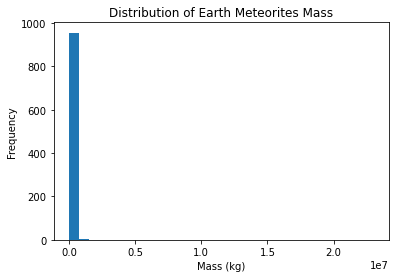

In [17]:
# Step 5: Data visualization

# Plotting the Earth meteorites' mass distribution
plt.hist(df['mass'], bins=30)
plt.xlabel('Mass (kg)')
plt.ylabel('Frequency')
plt.title('Distribution of Earth Meteorites Mass')
plt.show()

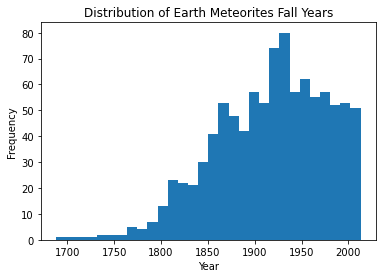

In [18]:
# Plotting the Earth meteorites' fall years
plt.hist(df['year'].dt.year, bins=30)
plt.xlabel('Year')
plt.ylabel('Frequency')
plt.title('Distribution of Earth Meteorites Fall Years')
plt.show()

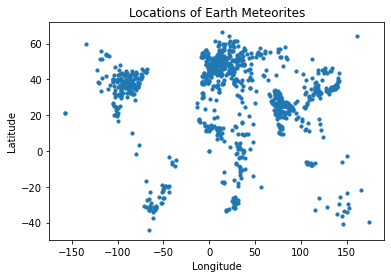

In [19]:
# Plotting the Earth meteorites' locations on a scatter plot
plt.scatter(df['reclong'], df['reclat'], s=10)
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Locations of Earth Meteorites')
plt.show()

In [20]:
# Step 6: Printing the insights and analysis results

print('Insights and Analysis Results:')
print('------------------------------------')
print('1. Earth meteorites that fell before the year 2000:')
print(earth_meteorites_before_2000[['name', 'id', 'nametype', 'recclass', 'mass', 'year']])
print('------------------------------------')
print('2. Earth meteorites coordinates that fell before the year 1970:')
print(earth_meteorites_coordinates_before_1970)
print('------------------------------------')
print('3. Earth meteorites with mass more than 10000 kg:')
print(earth_meteorites_mass_above_10000kg[['name', 'id', 'nametype', 'recclass', 'mass', 'year']])
print('------------------------------------')

Insights and Analysis Results:
------------------------------------
1. Earth meteorites that fell before the year 2000:
          name     id nametype     recclass      mass       year
0       Aachen      1    Valid           L5      21.0 1880-01-01
1       Aarhus      2    Valid           H6     720.0 1951-01-01
2         Abee      6    Valid          EH4  107000.0 1952-01-01
3     Acapulco     10    Valid  Acapulcoite    1914.0 1976-01-01
4      Achiras    370    Valid           L6     780.0 1902-01-01
..         ...    ...      ...          ...       ...        ...
994   Timochin  24004    Valid           H5   65500.0 1807-01-01
995   Tirupati  24009    Valid           H6     230.0 1934-01-01
997      Tjabe  24011    Valid           H6   20000.0 1869-01-01
998   Tjerebon  24012    Valid           L5   16500.0 1922-01-01
999  Tomakovka  24019    Valid          LL6     600.0 1905-01-01

[903 rows x 6 columns]
------------------------------------
2. Earth meteorites coordinates that fe

Question 8 -
Using the data from Question 5, write code the analyze the data and answer the following questions Note -
1. Draw plots to demonstrate the analysis for the following questions and better visualizations
2. Write code comments wherever required for code understanding

Insights to be drawn -
● Get all the overall ratings for each season and using plots compare the ratings for all the
seasons, like season 1 ratings, season 2, and so on.
● Get all the episode names, whose average rating is more than 8 for every season
● Get all the episode names that aired before May 2019
● Get the episode name from each season with the highest and lowest rating
● Get the summary for the most popular ( ratings ) episode in every season

In [21]:
import requests
import matplotlib.pyplot as plt

# Step 1: Fetch the data from the API
url = "http://api.tvmaze.com/singlesearch/shows?q=westworld&embed=episodes"
response = requests.get(url)
data = response.json()

In [22]:
data

{'id': 1371,
 'url': 'https://www.tvmaze.com/shows/1371/westworld',
 'name': 'Westworld',
 'type': 'Scripted',
 'language': 'English',
 'genres': ['Drama', 'Science-Fiction', 'Western'],
 'status': 'Ended',
 'runtime': 60,
 'averageRuntime': 63,
 'premiered': '2016-10-02',
 'ended': '2022-08-14',
 'officialSite': 'http://www.hbo.com/westworld',
 'schedule': {'time': '21:00', 'days': ['Sunday']},
 'rating': {'average': 8.2},
 'weight': 99,
 'network': {'id': 8,
  'name': 'HBO',
  'country': {'name': 'United States',
   'code': 'US',
   'timezone': 'America/New_York'},
  'officialSite': 'https://www.hbo.com/'},
 'webChannel': None,
 'dvdCountry': None,
 'externals': {'tvrage': 37537, 'thetvdb': 296762, 'imdb': 'tt0475784'},
 'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_portrait/445/1113927.jpg',
  'original': 'https://static.tvmaze.com/uploads/images/original_untouched/445/1113927.jpg'},
 'summary': '<p><b>Westworld</b> is a dark odyssey about the dawn of artifici

In [23]:
# Step 2: Data Analysis

# Extract the episodes data
episodes = data["_embedded"]["episodes"]
episodes

[{'id': 869671,
  'url': 'https://www.tvmaze.com/episodes/869671/westworld-1x01-the-original',
  'name': 'The Original',
  'season': 1,
  'number': 1,
  'type': 'regular',
  'airdate': '2016-10-02',
  'airtime': '21:00',
  'airstamp': '2016-10-03T01:00:00+00:00',
  'runtime': 68,
  'rating': {'average': 8},
  'image': {'medium': 'https://static.tvmaze.com/uploads/images/medium_landscape/78/195475.jpg',
   'original': 'https://static.tvmaze.com/uploads/images/original_untouched/78/195475.jpg'},
  'summary': "<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>",
  '_links': {'self': {'href': 'https://api.tvmaze.com/episodes/869671'},
   'show': {'href': 'https://api.tvmaze.com/shows/1371'}}},
 {'id': 911201,
  'url':

In [24]:
# Question 1: Get all the overall ratings for each season and compare the ratings for all the seasons
season_ratings = {}
for episode in episodes:
    season = episode["season"]
    rating = episode["rating"]["average"]
    if season in season_ratings:
        season_ratings[season].append(rating)
    else:
        season_ratings[season] = [rating]
print( season_ratings)

{1: [8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7], 2: [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5], 3: [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7], 4: [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]}


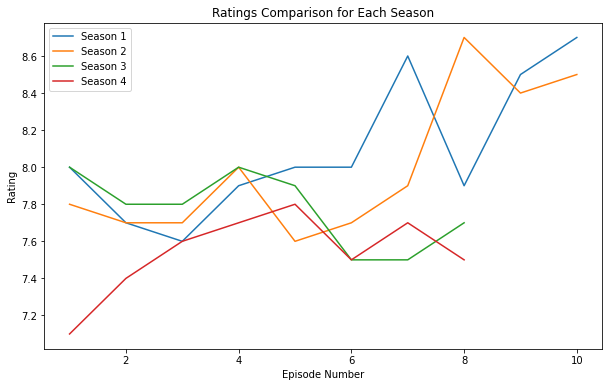

In [25]:
# Plotting the ratings for each season
plt.figure(figsize=(10, 6))
for season, ratings in season_ratings.items():
    plt.plot(range(1, len(ratings) + 1), ratings, label=f"Season {season}")
plt.xlabel('Episode Number')
plt.ylabel('Rating')
plt.title('Ratings Comparison for Each Season')
plt.legend()
plt.show()

In [26]:
# Question 2: Get all the episode names whose average rating is more than 8 for every season
highly_rated_episodes = []
for season, ratings in season_ratings.items():
    average_rating = sum(ratings) / len(ratings)
    if average_rating > 8:
        season_episodes = [episode["name"] for episode in episodes if episode["season"] == season]
        highly_rated_episodes.extend(season_episodes)
print(highly_rated_episodes)

['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind']


In [27]:
# Question 3: Get all the episode names that aired before May 2019
episodes_before_may_2019 = [episode["name"] for episode in episodes if episode["airdate"] < "2019-05"]
episodes_before_may_2019

['The Original',
 'Chestnut',
 'The Stray',
 'Dissonance Theory',
 'Contrapasso',
 'The Adversary',
 "Trompe L'Oeil",
 'Trace Decay',
 'The Well-Tempered Clavier',
 'The Bicameral Mind',
 'Journey Into Night',
 'Reunion',
 'Virtù e Fortuna',
 'The Riddle of the Sphinx',
 'Akane No Mai',
 'Phase Space',
 'Les Écorchés',
 'Kiksuya',
 'Vanishing Point',
 'The Passenger']

In [28]:
# Question 4: Get the episode name from each season with the highest and lowest rating
highest_rated_episodes = {}
lowest_rated_episodes = {}
for season, ratings in season_ratings.items():
    max_rating = max(ratings)
    min_rating = min(ratings)
    episode_max = episodes[ratings.index(max_rating)]["name"]
    episode_min = episodes[ratings.index(min_rating)]["name"]
    highest_rated_episodes[season] = episode_max
    lowest_rated_episodes[season] = episode_min
print("HRE:" , highest_rated_episodes)
print("LRE:" , lowest_rated_episodes)

HRE: {1: 'The Bicameral Mind', 2: 'Trace Decay', 3: 'The Original', 4: 'Contrapasso'}
LRE: {1: 'The Stray', 2: 'Contrapasso', 3: 'The Adversary', 4: 'The Original'}


In [29]:
# Question 5: Get the summary for the most popular (highest-rated) episode in every season
most_popular_episodes = {}
for season, ratings in season_ratings.items():
    max_rating = max(ratings)
    episode = episodes[ratings.index(max_rating)]
    most_popular_episodes[season] = episode["name"], episode["summary"]
print(most_popular_episodes)

{1: ('The Bicameral Mind', "<p>Delores finds out the truth about William's fate. Meanwhile, Maeve organizes an escape plan, only to discover that someone else is pulling the strings. And Robert plays the final piece in his grand narrative.</p>"), 2: ('Trace Decay', "<p>Bernard tries to cope with what he did under Robert's orders. Meanwhile, William and Dolores find a town, and Maeve remembers more of her past. Meanwhile, the Man reveals his past to Teddy.</p>"), 3: ('The Original', "<p>A woman named Dolores is a free spirit in the Old West... and unaware that she's actually an android, programmed to entertain rich guests seeking to act out their fantasies in an idealized vision of the 1880s. However, the people in charge soon realize that their androids are acting in ways that they didn't anticipate.</p>"), 4: ('Contrapasso', "<p>Dolores takes the first step on her path of discovery by deciding to write a new story for herself... where she isn't the damsel. Meanwhile, Elise discovers t

In [30]:
# Step 3: Printing the insights and analysis results

print("Insights and Analysis Results:")
print("------------------------------------")
print("1. Overall Ratings for Each Season:")
for season, ratings in season_ratings.items():
    print(f"Season {season} Ratings: {ratings}")
print("------------------------------------")
print("2. Episode Names with Average Rating > 8 for Every Season:")
print(highly_rated_episodes)
print("------------------------------------")
print("3. Episode Names Aired Before May 2019:")
print(episodes_before_may_2019)
print("------------------------------------")
print("4. Episode Names with Highest and Lowest Rating in Each Season:")
print("Highest Rated Episodes:")
print(highest_rated_episodes)
print("Lowest Rated Episodes:")
print(lowest_rated_episodes)
print("------------------------------------")
print("5. Summary for the Most Popular Episode in Each Season:")
for season, episode_info in most_popular_episodes.items():
    print(f"Season {season} - Episode: {episode_info[0]}")
    print(f"Summary: {episode_info[1]}")
    print("------------------------------------")

Insights and Analysis Results:
------------------------------------
1. Overall Ratings for Each Season:
Season 1 Ratings: [8, 7.7, 7.6, 7.9, 8, 8, 8.6, 7.9, 8.5, 8.7]
Season 2 Ratings: [7.8, 7.7, 7.7, 8, 7.6, 7.7, 7.9, 8.7, 8.4, 8.5]
Season 3 Ratings: [8, 7.8, 7.8, 8, 7.9, 7.5, 7.5, 7.7]
Season 4 Ratings: [7.1, 7.4, 7.6, 7.7, 7.8, 7.5, 7.7, 7.5]
------------------------------------
2. Episode Names with Average Rating > 8 for Every Season:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind']
------------------------------------
3. Episode Names Aired Before May 2019:
['The Original', 'Chestnut', 'The Stray', 'Dissonance Theory', 'Contrapasso', 'The Adversary', "Trompe L'Oeil", 'Trace Decay', 'The Well-Tempered Clavier', 'The Bicameral Mind', 'Journey Into Night', 'Reunion', 'Virtù e Fortuna', 'The Riddle of the Sphinx', 'Akane No Mai', 'Phase Space', 'Les Écorché

Question 9 -
Write a program to read the data from the following link, perform data analysis and answer the following
questions
Note -
1. Write code comments wherever required for code understanding
Link - https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD
Insights to be drawn -
● Get all the cars and their types that do not qualify for clean alternative fuel vehicle
● Get all TESLA cars with the model year, and model type made in Bothell City.
● Get all the cars that have an electric range of more than 100, and were made after
2015
● Draw plots to show the distribution between city and electric vehicle type

In [3]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Read the data from the provided URL
url = 'https://data.wa.gov/api/views/f6w7-q2d2/rows.csv?accessType=DOWNLOAD'
df = pd.read_csv(url)

In [4]:
df

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
1,JHMZC5F37M,Kitsap,Poulsbo,WA,98370.0,2021,HONDA,CLARITY,Plug-in Hybrid Electric Vehicle (PHEV),Clean Alternative Fuel Vehicle Eligible,47,0,23.0,171566447,POINT (-122.64681 47.73689),PUGET SOUND ENERGY INC,5.303509e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
3,1N4AZ0CP5D,King,Seattle,WA,98119.0,2013,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,75,0,36.0,211807760,POINT (-122.3684 47.64586),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130438,7SAYGDEE6P,Pierce,Gig Harbor,WA,98335.0,2023,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,26.0,231134102,POINT (-122.58354539999999 47.32344880000005),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305307e+10
130439,1N4BZ1CV7N,Pierce,Tacoma,WA,98408.0,2022,NISSAN,LEAF,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,29.0,185810943,POINT (-122.43810499999995 47.203220000000044),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130440,5YJYGDEE8M,King,Seattle,WA,98109.0,2021,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Eligibility unknown as battery range has not b...,0,0,36.0,176542418,POINT (-122.35022 47.63824),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
130441,5YJXCBE22L,Island,Camano Island,WA,98282.0,2020,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,293,0,10.0,102834938,POINT (-122.40049 48.23986),BONNEVILLE POWER ADMINISTRATION||PUD 1 OF SNOH...,5.302997e+10


In [5]:
# Step 2: Data Analysis

# Question 1: Get all the cars and their types that do not qualify for clean alternative fuel vehicle
non_clean_fuel_cars = df[df['Clean Alternative Fuel Vehicle (CAFV) Eligibility'] != 'Clean Alternative Fuel Vehicle Eligible'][['Make', 'Model']]
non_clean_fuel_cars

,Make,Model
6,FORD,FUSION
7,AUDI,Q5 E
8,FORD,C-MAX
11,TESLA,MODEL Y
14,FORD,C-MAX
...,...,...
130437,BMW,530E
130438,TESLA,MODEL Y
130439,NISSAN,LEAF
130440,TESLA,MODEL Y


In [6]:
# Question 2: Get all TESLA cars with the model year, and model type made in Bothell City
tesla_cars_bothell = df[(df['Make'] == 'TESLA') & (df['City'] == 'Bothell')][['Model Year', 'Model']]
tesla_cars_bothell

,Model Year,Model
39,2020,MODEL 3
217,2022,MODEL 3
218,2022,MODEL Y
222,2018,MODEL 3
292,2017,MODEL X
...,...,...
129778,2019,MODEL 3
129954,2021,MODEL 3
129976,2014,MODEL S
130295,2022,MODEL 3


In [7]:
# Question 3: Get all the cars that have an electric range of more than 100, and were made after 2015
cars_electric_range_gt_100 = df[(df['Electric Range'] > 100) & (df['Model Year'] > 2015)]
cars_electric_range_gt_100

,VIN (1-10),County,City,State,Postal Code,Model Year,Make,Model,Electric Vehicle Type,Clean Alternative Fuel Vehicle (CAFV) Eligibility,Electric Range,Base MSRP,Legislative District,DOL Vehicle ID,Vehicle Location,Electric Utility,2020 Census Tract
0,5YJXCAE26J,Yakima,Yakima,WA,98908.0,2018,TESLA,MODEL X,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,238,0,14.0,141151601,POINT (-120.56916 46.58514),PACIFICORP,5.307700e+10
2,5YJ3E1EB0K,King,Seattle,WA,98199.0,2019,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,220,0,36.0,9426525,POINT (-122.40092 47.65908),CITY OF SEATTLE - (WA)|CITY OF TACOMA - (WA),5.303301e+10
4,5YJSA1E21H,Thurston,Lacey,WA,98516.0,2017,TESLA,MODEL S,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,210,0,22.0,185810306,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
12,5YJ3E1EC7L,Thurston,Lacey,WA,98503.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,308,0,22.0,2135486,POINT (-122.82324 47.04437),PUGET SOUND ENERGY INC,5.306701e+10
13,5YJ3E1EB2L,Thurston,Olympia,WA,98516.0,2020,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,322,0,22.0,124645363,POINT (-122.75379 47.06316),PUGET SOUND ENERGY INC,5.306701e+10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
130417,5YJYGDEE5L,Pierce,Tacoma,WA,98444.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,29.0,112591538,POINT (-122.46495 47.16778),BONNEVILLE POWER ADMINISTRATION||CITY OF TACOM...,5.305306e+10
130428,1N4AZ1CP0J,Clallam,Sequim,WA,98382.0,2018,NISSAN,LEAF,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,151,0,24.0,290405174,POINT (-123.09968999999995 48.08137000000005),BONNEVILLE POWER ADMINISTRATION||PUD NO 1 OF C...,5.300900e+10
130432,5YJYGDEEXL,King,Vashon,WA,98070.0,2020,TESLA,MODEL Y,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,291,0,34.0,112734723,POINT (-122.4573 47.44929),PUGET SOUND ENERGY INC||CITY OF TACOMA - (WA),5.303303e+10
130436,5YJ3E1EB0J,Whatcom,Blaine,WA,98230.0,2018,TESLA,MODEL 3,Battery Electric Vehicle (BEV),Clean Alternative Fuel Vehicle Eligible,215,0,42.0,103521302,POINT (-122.74888 48.99404),PUGET SOUND ENERGY INC||PUD NO 1 OF WHATCOM CO...,5.307301e+10


<Figure size 864x1440 with 0 Axes>

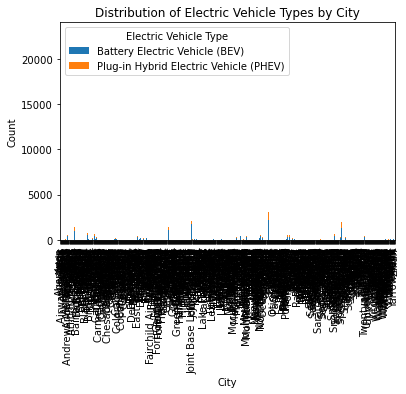

Insights and Analysis Results:
------------------------------------
1. Cars and their types that do not qualify for clean alternative fuel vehicle:
          Make    Model
6         FORD   FUSION
7         AUDI     Q5 E
8         FORD    C-MAX
11       TESLA  MODEL Y
14        FORD    C-MAX
...        ...      ...
130437     BMW     530E
130438   TESLA  MODEL Y
130439  NISSAN     LEAF
130440   TESLA  MODEL Y
130442   TESLA  MODEL 3

[69892 rows x 2 columns]
------------------------------------
2. TESLA cars with the model year and model type made in Bothell City:
        Model Year    Model
39            2020  MODEL 3
217           2022  MODEL 3
218           2022  MODEL Y
222           2018  MODEL 3
292           2017  MODEL X
...            ...      ...
129778        2019  MODEL 3
129954        2021  MODEL 3
129976        2014  MODEL S
130295        2022  MODEL 3
130392        2018  MODEL 3

[2407 rows x 2 columns]
------------------------------------
3. Cars with an electric range o

In [8]:
# Step 3: Data visualization

# Plotting the distribution between city and electric vehicle type
plt.figure(figsize=(12, 20))
df.groupby(['City', 'Electric Vehicle Type']).size().unstack().plot(kind='bar', stacked=True)
plt.xlabel('City')
plt.ylabel('Count')
plt.title('Distribution of Electric Vehicle Types by City')
plt.legend(title='Electric Vehicle Type')
plt.show()

# Step 4: Printing the insights and analysis results

print('Insights and Analysis Results:')
print('------------------------------------')
print('1. Cars and their types that do not qualify for clean alternative fuel vehicle:')
print(non_clean_fuel_cars)
print('------------------------------------')
print('2. TESLA cars with the model year and model type made in Bothell City:')
print(tesla_cars_bothell)
print('------------------------------------')
print('3. Cars with an electric range of more than 100 and made after 2015:')
print(cars_electric_range_gt_100)
print('------------------------------------')

Question 10 - Write a program to count the number of verbs, nouns, pronouns, and adjectives in a given particular phrase or paragraph, and return their respective count as a dictionary. Note -

Write code comments wherever required for code
You have to write at least 2 additional test cases in which your program will run successfully and provide
an explanation for the same

In [10]:
pip install nltk

Note: you may need to restart the kernel to use updated packages.


In [1]:
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag

def count_pos_tags(text):
    # Tokenize the text into sentences
    sentences = sent_tokenize(text)
    
    # Initialize counts for verbs, nouns, pronouns, and adjectives
    verb_count = 0
    noun_count = 0
    pronoun_count = 0
    adjective_count = 0
    
    # Iterate over each sentence
    for sentence in sentences:
        # Tokenize the sentence into words
        words = word_tokenize(sentence)
        
        # Perform part-of-speech tagging
        tagged_words = pos_tag(words)
        
        # Count the number of verbs, nouns, pronouns, and adjectives
        for word, tag in tagged_words:
            if tag.startswith('V'):  # Verbs
                verb_count += 1
            elif tag.startswith('N'):  # Nouns
                noun_count += 1
            elif tag == 'PRP' or tag == 'PRP$':  # Pronouns
                pronoun_count += 1
            elif tag.startswith('JJ'):  # Adjectives
                adjective_count += 1
    
    # Return the counts as a dictionary
    pos_counts = {
        'verbs': verb_count,
        'nouns': noun_count,
        'pronouns': pronoun_count,
        'adjectives': adjective_count
    }
    
    return pos_counts

# Test cases
text1 = "I love eating pizza."
text2 = "The cat sat on the mat, and it was fluffy."

# Count the part-of-speech tags in the given texts
result1 = count_pos_tags(text1)
result2 = count_pos_tags(text2)

# Print the results
print("Count of part-of-speech tags in text 1:")
print(result1)
print()
print("Count of part-of-speech tags in text 2:")
print(result2)

Count of part-of-speech tags in text 1:
{'verbs': 2, 'nouns': 1, 'pronouns': 1, 'adjectives': 0}

Count of part-of-speech tags in text 2:
{'verbs': 3, 'nouns': 2, 'pronouns': 1, 'adjectives': 0}


In [2]:
import nltk

# Download the 'punkt' resource
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\91703\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [3]:
import nltk
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\91703\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


True